In [140]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [141]:
import pandas as pd
url = '/content/drive/MyDrive/2023_TAMU_competition_data/medclms_holdout.csv'
medclms_holdout_df = pd.read_csv(url)
url = '/content/drive/MyDrive/2023_TAMU_competition_data/medclms_train.csv'
medclms_train_df = pd.read_csv(url)
url = '/content/drive/MyDrive/2023_TAMU_competition_data/rxclms_holdout.csv'
rxclms_holdout_df = pd.read_csv(url)
url = '/content/drive/MyDrive/2023_TAMU_competition_data/rxclms_train.csv'
rxclms_train_df = pd.read_csv(url)
url = '/content/drive/MyDrive/2023_TAMU_competition_data/target_holdout.csv'
target_holdout = pd.read_csv(url)
url = '/content/drive/MyDrive/2023_TAMU_competition_data/target_train.csv'
target_train_df = pd.read_csv(url)
url = '/content/drive/MyDrive/2023_TAMU_competition_data/target_holdout_merged.csv'
target_holdout_merged = pd.read_csv(url)


In [142]:
medclms_train_df['visit_date'] = pd.to_datetime(medclms_train_df['visit_date'], format='%Y-%m-%d', errors='coerce').dt.date
target_train_df['therapy_start_date'] = pd.to_datetime(target_train_df['therapy_start_date'], format='%Y-%m-%d', errors='coerce').dt.date
target_train_df['therapy_end_date'] = pd.to_datetime(target_train_df['therapy_end_date'], format='%Y-%m-%d', errors='coerce').dt.date
rxclms_train_df['service_date'] = pd.to_datetime(rxclms_train_df['service_date'], format='%Y-%m-%d', errors='coerce').dt.date

In [143]:

# Merge the DataFrames on therapy_id
merged_df = pd.merge(medclms_train_df, target_train_df, on='therapy_id', how='inner')

# Apply the filter
medclms_train_df = merged_df[(merged_df['visit_date'] >= merged_df['therapy_start_date']) & (merged_df['visit_date'] <= merged_df['therapy_end_date'])]
columns_to_keep = ['therapy_id', 'medclm_key', 'clm_unique_key', 'primary_diag_cd', 'visit_date', 'diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5', 'diag_cd6', 'diag_cd7', 'diag_cd8',
                   'diag_cd9', 'process_date', 'reversal_ind', 'pot', 'util_cat', 'hedis_pot', 'clm_type', 'ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis',
                   'fatigue_diagnosis', 'nausea_diagnosis', 'hyperglycemia_diagnosis', 'constipation_diagnosis', 'diarrhea_diagnosis']
medclms_train_df= medclms_train_df[columns_to_keep]

# Now, filtered_df contains the rows where visit_date is less than therapy_start_date

In [144]:
# Merge the DataFrames on therapy_id
merged_dfs = pd.merge(rxclms_train_df, target_train_df, on='therapy_id', how='inner')

# Apply the filter
rxclms_train_df = merged_dfs[(merged_dfs['service_date'] >= merged_dfs['therapy_start_date']) & (merged_dfs['service_date'] <= merged_dfs['therapy_end_date'])]
columns_to_keep = [
    'id','therapy_id', 'document_key', 'ndc_id', 'service_date', 'process_date',
    'pay_day_supply_cnt', 'rx_cost', 'tot_drug_cost_accum_amt',
    'reversal_ind', 'mail_order_ind', 'generic_ind', 'maint_ind',
    'gpi_drug_group_desc', 'gpi_drug_class_desc', 'hum_drug_class_desc',
    'strength_meas', 'metric_strength', 'specialty_ind', 'clm_type',
    'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 'nausea_treat_ind', 'seizure_treat_ind'
]
rxclms_train_df= rxclms_train_df[columns_to_keep]

# Now, filtered_df contains the rows where service_date is less than therapy_start_date

In [145]:
print(medclms_train_df.columns)

Index(['therapy_id', 'medclm_key', 'clm_unique_key', 'primary_diag_cd',
       'visit_date', 'diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5',
       'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9', 'process_date',
       'reversal_ind', 'pot', 'util_cat', 'hedis_pot', 'clm_type',
       'ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis',
       'fatigue_diagnosis', 'nausea_diagnosis', 'hyperglycemia_diagnosis',
       'constipation_diagnosis', 'diarrhea_diagnosis'],
      dtype='object')


In [146]:
def most_common_category(series):
    # Use the mode() function to find the most common category
    modes = series.mode()
    if not modes.empty:
        return modes.iloc[0]
    else:
        return None


# Columns to aggregate with the most common category
columns_to_aggregate = ['diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5', 'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9','primary_diag_cd','pot','util_cat','hedis_pot']

mediclaim_agg = medclms_train_df.groupby('therapy_id')[columns_to_aggregate].agg(most_common_category).reset_index()
# Columns for which you want to find the maximum values
columns_to_aggregate = [
    'ade_diagnosis',
    'seizure_diagnosis',
    'pain_diagnosis',
    'fatigue_diagnosis',
    'nausea_diagnosis',
    'hyperglycemia_diagnosis',
    'constipation_diagnosis',
    'diarrhea_diagnosis'
]

# Add the therapy_id column to your selection
columns_to_aggregate.append('therapy_id')

# Create a DataFrame with the maximum values for the specified columns
mediclaim_max = medclms_train_df[columns_to_aggregate].groupby('therapy_id').max().reset_index()
# Merge the mediclaim_agg and mediclaim_max DataFrames on 'therapy_id'
mediclaim_agg = mediclaim_agg.merge(mediclaim_max, on='therapy_id', how='left')



In [147]:
mediclaim_agg

,therapy_id,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,diag_cd7,diag_cd8,diag_cd9,primary_diag_cd,...,util_cat,hedis_pot,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
0,1000110916-TAGRISSO-1,J90,I4891,C3490,I10,M48062,M4316,E119,Z923,C3490,...,Physician_Office,Other,1,0,0,0,0,0,1,0
1,1000207687-TAGRISSO-1,D62,N179,I4820,I429,C3491,K649,I2510,I129,K625,...,IP_ACUTE,Other,0,0,0,0,0,0,0,0
2,1000260673-TAGRISSO-1,J189,J9601,N179,J441,J440,J90,N1830,Z515,A419,...,IP_ACUTE,Other,0,0,0,0,0,0,0,0
3,1000767323-TAGRISSO-1,E785,N400,C7951,C779,G620,T451X5A,E1169,R9720,C342,...,Outpatient,Other,0,0,0,0,0,0,0,0
4,1000767683-TAGRISSO-1,C7931,D72819,D6481,T451X5A,R05,R110,K219,E279,C3431,...,Outpatient,Other,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1121093945-TAGRISSO-1,D500,E7800,R059,C3412,Z794,None,None,None,C3412,...,Outpatient,Other,0,0,0,0,0,0,0,0
516,1121210255-TAGRISSO-1,Z87891,None,None,None,None,None,None,None,C3411,...,Physician_Office,Other,0,0,0,0,0,0,0,0
517,1121906962-TAGRISSO-1,C779,Z1331,Z1339,L853,T451X5A,D630,Z6841,Z713,C3491,...,Outpatient,Other,0,0,0,0,0,0,0,0
518,1121951424-TAGRISSO-1,Z902,Z853,M810,E785,Z9010,Z79899,None,None,C3490,...,Outpatient,Other,0,0,0,0,0,0,0,0


In [148]:
target_train_df=target_train_df.merge(mediclaim_agg, on='therapy_id', how='left')

In [149]:
# Columns to aggregate with the most common category
columns_to_aggregate = ['diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5', 'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9','primary_diag_cd','pot','util_cat','hedis_pot']

mediclaim_agg = medclms_train_df.groupby('therapy_id')[columns_to_aggregate].agg(most_common_category).reset_index()
# Columns for which you want to find the maximum values
columns_to_aggregate = [
    'ade_diagnosis',
    'seizure_diagnosis',
    'pain_diagnosis',
    'fatigue_diagnosis',
    'nausea_diagnosis',
    'hyperglycemia_diagnosis',
    'constipation_diagnosis',
    'diarrhea_diagnosis'
]

# Add the therapy_id column to your selection
columns_to_aggregate.append('therapy_id')

# Create a DataFrame with the maximum values for the specified columns
mediclaim_max = medclms_train_df[columns_to_aggregate].groupby('therapy_id').max().reset_index()
# Merge the mediclaim_agg and mediclaim_max DataFrames on 'therapy_id'
mediclaim_agg = mediclaim_agg.merge(mediclaim_max, on='therapy_id', how='left')

def most_common_category(series):
    # Use the mode() function to find the most common category
    modes = series.mode()
    if not modes.empty:
        return modes.iloc[0]
    else:
        return None

columns_to_aggregate = ['generic_ind', 'maint_ind', 'gpi_drug_group_desc', 'gpi_drug_class_desc', 'hum_drug_class_desc','mail_order_ind' ]
rxclaim_agg = rxclms_train_df.groupby('therapy_id')[columns_to_aggregate].agg(most_common_category).reset_index()
# Columns for which you want to find the maximum values
columns_to_aggregate = [
    'ddi_ind',
    'anticoag_ind',
    'diarrhea_treat_ind',
    'nausea_treat_ind',
    'seizure_treat_ind']
# Add the therapy_id column to your selection
columns_to_aggregate.append('therapy_id')
# Create a DataFrame with the maximum values for the specified columns
rxclaim_max = rxclms_train_df[columns_to_aggregate].groupby('therapy_id').max().reset_index()
rxclaim_agg = rxclaim_agg.merge(rxclaim_max, on='therapy_id', how='left')


In [150]:
print(rxclaim_agg.columns)

Index(['therapy_id', 'generic_ind', 'maint_ind', 'gpi_drug_group_desc',
       'gpi_drug_class_desc', 'hum_drug_class_desc', 'mail_order_ind',
       'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 'nausea_treat_ind',
       'seizure_treat_ind'],
      dtype='object')


In [151]:
# Calculate the sum and mean of 'rx_cost' and 'tot_drug_cost_accum_amt' by 'therapy_id'
rxclaim_sum_mean = rxclms_train_df.groupby('therapy_id')['rx_cost', 'tot_drug_cost_accum_amt'].agg({'rx_cost': ['mean', 'sum'], 'tot_drug_cost_accum_amt': ['mean', 'sum']}).reset_index()

# Rename the columns to indicate sum and mean for both columns
rxclaim_sum_mean.columns = ['therapy_id', 'avg_rx_cost', 'sum_rx_cost', 'avg_tot_drug_cost', 'sum_tot_drug_cost']

# Merge the calculated values with rxclaim_agg based on 'therapy_id'
rxclaim_agg = rxclaim_agg.merge(rxclaim_sum_mean, on='therapy_id', how='left')


<ipython-input-151-bbe3f04e0dee>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rxclaim_sum_mean = rxclms_train_df.groupby('therapy_id')['rx_cost', 'tot_drug_cost_accum_amt'].agg({'rx_cost': ['mean', 'sum'], 'tot_drug_cost_accum_amt': ['mean', 'sum']}).reset_index()


In [152]:
print(rxclaim_agg.columns)

Index(['therapy_id', 'generic_ind', 'maint_ind', 'gpi_drug_group_desc',
       'gpi_drug_class_desc', 'hum_drug_class_desc', 'mail_order_ind',
       'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 'nausea_treat_ind',
       'seizure_treat_ind', 'avg_rx_cost', 'sum_rx_cost', 'avg_tot_drug_cost',
       'sum_tot_drug_cost'],
      dtype='object')


In [153]:

target_train_df = target_train_df.merge(rxclaim_agg, on='therapy_id', how='left')


In [154]:
import pandas as pd


# List of categorical columns to process
categorical_columns = ['maint_ind', 'specialty_ind', 'generic_ind']

# Initialize an empty DataFrame to store the count results
count_results = pd.DataFrame()

# Iterate over each categorical column
for column in categorical_columns:
    # Calculate the count of each category in the column
    category_counts = rxclms_train_df.groupby(['therapy_id', column]).size().unstack(fill_value=0)

    # Rename columns for clarity (optional)
    category_counts.columns = [f'count_{column}_{col}' for col in category_counts.columns]

    # Merge the count values with the count_results DataFrame
    count_results = pd.concat([count_results, category_counts], axis=1)

# Merge the left table (target_train_df) with the count results based on therapy_id
target_train_df = pd.merge(target_train_df, count_results, left_on='therapy_id', right_index=True, how='left')

# Now, target_train_df contains the merged data with unique IDs on the left from target_train_df
# and the count of each category in the specified columns from rxclms_train_df on the right
# You can access and work with the merged data as needed


In [155]:
print(target_train_df.head())

           id             therapy_id therapy_start_date therapy_end_date  \
0  1005597228  1005597228-TAGRISSO-1         2020-03-11       2020-09-07   
1  1005964858  1005964858-TAGRISSO-1         2021-08-23       2021-09-22   
2  1007548572  1007548572-TAGRISSO-1         2022-01-17       2022-07-16   
3  1009508044  1009508044-TAGRISSO-1         2020-01-23       2020-07-21   
4  1028064791  1028064791-TAGRISSO-1         2021-02-23       2021-08-22   

   tgt_ade_dc_ind  race_cd  est_age sex_cd  cms_disabled_ind  \
0               0      1.0      NaN    NaN               NaN   
1               1      1.0     86.0      M               0.0   
2               0      1.0     79.0      F               0.0   
3               0      1.0     70.0      F               1.0   
4               0      2.0     74.0      F               1.0   

   cms_low_income_ind  ...  avg_rx_cost sum_rx_cost avg_tot_drug_cost  \
0                 NaN  ...  7791.149333   116867.24          0.000000   
1           

In [156]:

correlation_matrix = target_train_df.corrwith(target_train_df['tgt_ade_dc_ind'])

# Display the correlation matrix
print(correlation_matrix)


id                            -0.031866
tgt_ade_dc_ind                 1.000000
race_cd                       -0.003919
est_age                        0.036461
cms_disabled_ind               0.007652
cms_low_income_ind            -0.012016
ade_diagnosis                  0.402469
seizure_diagnosis              0.064010
pain_diagnosis                 0.021009
fatigue_diagnosis              0.296652
nausea_diagnosis               0.241706
hyperglycemia_diagnosis       -0.021564
constipation_diagnosis         0.179114
diarrhea_diagnosis             0.098605
ddi_ind                       -0.025111
anticoag_ind                   0.060450
diarrhea_treat_ind             0.025396
nausea_treat_ind               0.119751
seizure_treat_ind             -0.014743
avg_rx_cost                   -0.072960
sum_rx_cost                   -0.175546
avg_tot_drug_cost             -0.113001
sum_tot_drug_cost             -0.081357
count_maint_ind_MAINT         -0.052091
count_maint_ind_NONMAINT      -0.038279


<ipython-input-156-4fb510b6f810>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = target_train_df.corrwith(target_train_df['tgt_ade_dc_ind'])


In [157]:
from google.colab import files

# Save the correlation_matrix to a file (e.g., CSV)
target_train_df.to_csv('target_train_df.csv', header=True)

# Download the file to your local machine
#files.download('target_train_df.csv')


In [158]:
# List of columns to convert to categorical
categorical_columns = [
    'sex_cd',
    'diag_cd2',
    'diag_cd3',
    'diag_cd4',
    'diag_cd5',
    'diag_cd6',
    'diag_cd7',
    'diag_cd8',
    'diag_cd9',
    'primary_diag_cd',
    'pot',
    'util_cat',
    'hedis_pot',
    'generic_ind',
    'maint_ind',
    'gpi_drug_group_desc',
    'gpi_drug_class_desc',
    'hum_drug_class_desc',
    'mail_order_ind'
]

# Convert the specified columns to categorical variables
for column in categorical_columns:
    target_train_df[column] = target_train_df[column].astype('category')


In [159]:

correlation_matrix = target_train_df.corrwith(target_train_df['tgt_ade_dc_ind'])

# Display the correlation matrix
print(correlation_matrix)


id                            -0.031866
tgt_ade_dc_ind                 1.000000
race_cd                       -0.003919
est_age                        0.036461
cms_disabled_ind               0.007652
cms_low_income_ind            -0.012016
ade_diagnosis                  0.402469
seizure_diagnosis              0.064010
pain_diagnosis                 0.021009
fatigue_diagnosis              0.296652
nausea_diagnosis               0.241706
hyperglycemia_diagnosis       -0.021564
constipation_diagnosis         0.179114
diarrhea_diagnosis             0.098605
ddi_ind                       -0.025111
anticoag_ind                   0.060450
diarrhea_treat_ind             0.025396
nausea_treat_ind               0.119751
seizure_treat_ind             -0.014743
avg_rx_cost                   -0.072960
sum_rx_cost                   -0.175546
avg_tot_drug_cost             -0.113001
sum_tot_drug_cost             -0.081357
count_maint_ind_MAINT         -0.052091
count_maint_ind_NONMAINT      -0.038279


<ipython-input-159-4fb510b6f810>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = target_train_df.corrwith(target_train_df['tgt_ade_dc_ind'])


In [160]:
target_train_df = target_train_df.drop(columns=['therapy_start_date','therapy_end_date','therapy_id'])

In [161]:
print(target_train_df.columns)

Index(['id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd',
       'cms_disabled_ind', 'cms_low_income_ind', 'diag_cd2', 'diag_cd3',
       'diag_cd4', 'diag_cd5', 'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9',
       'primary_diag_cd', 'pot', 'util_cat', 'hedis_pot', 'ade_diagnosis',
       'seizure_diagnosis', 'pain_diagnosis', 'fatigue_diagnosis',
       'nausea_diagnosis', 'hyperglycemia_diagnosis', 'constipation_diagnosis',
       'diarrhea_diagnosis', 'generic_ind', 'maint_ind', 'gpi_drug_group_desc',
       'gpi_drug_class_desc', 'hum_drug_class_desc', 'mail_order_ind',
       'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 'nausea_treat_ind',
       'seizure_treat_ind', 'avg_rx_cost', 'sum_rx_cost', 'avg_tot_drug_cost',
       'sum_tot_drug_cost', 'count_maint_ind_MAINT',
       'count_maint_ind_NONMAINT', 'count_specialty_ind_NONSPCL',
       'count_specialty_ind_SPCL', 'count_generic_ind_BRANDED',
       'count_generic_ind_GENERIC'],
      dtype='object')


In [162]:
# Count null values in each column of target_train_df
null_counts = target_train_df.isnull().sum()

# Display the counts of null values for each column
print(null_counts)


id                               0
tgt_ade_dc_ind                   0
race_cd                         68
est_age                         83
sex_cd                          83
cms_disabled_ind                83
cms_low_income_ind              83
diag_cd2                       723
diag_cd3                       746
diag_cd4                       762
diag_cd5                       806
diag_cd6                       832
diag_cd7                       869
diag_cd8                       911
diag_cd9                       947
primary_diag_cd                712
pot                            712
util_cat                       717
hedis_pot                      712
ade_diagnosis                  712
seizure_diagnosis              712
pain_diagnosis                 712
fatigue_diagnosis              712
nausea_diagnosis               712
hyperglycemia_diagnosis        712
constipation_diagnosis         712
diarrhea_diagnosis             712
generic_ind                     86
maint_ind           

In [163]:
columns_to_convert = ["cms_disabled_ind","cms_low_income_ind",

    "tgt_ade_dc_ind",
    "race_cd",
    "ade_diagnosis",
    "seizure_diagnosis",
    "pain_diagnosis",
    "fatigue_diagnosis",
    "nausea_diagnosis",
    "hyperglycemia_diagnosis",
    "constipation_diagnosis",
    "diarrhea_diagnosis",
    "ddi_ind",
    "anticoag_ind",
    "diarrhea_treat_ind",
    "nausea_treat_ind",
    "seizure_treat_ind"
]

target_train_df[columns_to_convert] = target_train_df[columns_to_convert].astype("category")


In [164]:
print(target_train_df.dtypes)


id                                int64
tgt_ade_dc_ind                 category
race_cd                        category
est_age                         float64
sex_cd                         category
cms_disabled_ind               category
cms_low_income_ind             category
diag_cd2                       category
diag_cd3                       category
diag_cd4                       category
diag_cd5                       category
diag_cd6                       category
diag_cd7                       category
diag_cd8                       category
diag_cd9                       category
primary_diag_cd                category
pot                            category
util_cat                       category
hedis_pot                      category
ade_diagnosis                  category
seizure_diagnosis              category
pain_diagnosis                 category
fatigue_diagnosis              category
nausea_diagnosis               category
hyperglycemia_diagnosis        category


In [165]:
columns_to_impute = [
    "est_age",
    "avg_rx_cost",
    "sum_rx_cost",
    "avg_tot_drug_cost",
    "sum_tot_drug_cost","count_maint_ind_MAINT","count_maint_ind_NONMAINT","count_specialty_ind_NONSPCL","count_specialty_ind_SPCL","count_generic_ind_BRANDED","count_generic_ind_GENERIC"
]

# Impute missing values with the mean for the selected columns
target_train_df[columns_to_impute] = target_train_df[columns_to_impute].fillna(target_train_df[columns_to_impute].mean())


In [166]:
import pandas as pd

# List of categorical columns to impute with mode
categorical_columns_to_impute = [
    "race_cd",
    "sex_cd",
    "cms_disabled_ind",
    "cms_low_income_ind",
    "diag_cd2",
    "diag_cd3",
    "diag_cd4",
    "diag_cd5",
    "diag_cd6",
    "diag_cd7",
    "diag_cd8",
    "diag_cd9",
    "primary_diag_cd",
    "pot",
    "util_cat",
    "hedis_pot",
    "ade_diagnosis",
    "seizure_diagnosis",
    "pain_diagnosis",
    "fatigue_diagnosis",
    "nausea_diagnosis",
    "hyperglycemia_diagnosis",
    "constipation_diagnosis",
    "diarrhea_diagnosis",
    "generic_ind",
    "maint_ind",
    "gpi_drug_group_desc",
    "gpi_drug_class_desc",
    "hum_drug_class_desc",
    "mail_order_ind",
    "ddi_ind",
    "anticoag_ind",
    "diarrhea_treat_ind",
    "nausea_treat_ind",
    "seizure_treat_ind"
]

# Impute missing values with the mode for the selected columns
for column in categorical_columns_to_impute:
    target_train_df[column] = target_train_df[column].fillna(target_train_df[column].mode()[0])


In [167]:
# Count null values in each column of target_train_df
null_counts = target_train_df.isnull().sum()

# Display the counts of null values for each column
print(null_counts)


id                             0
tgt_ade_dc_ind                 0
race_cd                        0
est_age                        0
sex_cd                         0
cms_disabled_ind               0
cms_low_income_ind             0
diag_cd2                       0
diag_cd3                       0
diag_cd4                       0
diag_cd5                       0
diag_cd6                       0
diag_cd7                       0
diag_cd8                       0
diag_cd9                       0
primary_diag_cd                0
pot                            0
util_cat                       0
hedis_pot                      0
ade_diagnosis                  0
seizure_diagnosis              0
pain_diagnosis                 0
fatigue_diagnosis              0
nausea_diagnosis               0
hyperglycemia_diagnosis        0
constipation_diagnosis         0
diarrhea_diagnosis             0
generic_ind                    0
maint_ind                      0
gpi_drug_group_desc            0
gpi_drug_c

In [168]:
#target_train_df=target_train_df.drop(columns=['seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis'])
print(target_train_df.head())

           id tgt_ade_dc_ind race_cd    est_age sex_cd cms_disabled_ind  \
0  1005597228              0     1.0  73.771976      F              0.0   
1  1005964858              1     1.0  86.000000      M              0.0   
2  1007548572              0     1.0  79.000000      F              0.0   
3  1009508044              0     1.0  70.000000      F              1.0   
4  1028064791              0     2.0  74.000000      F              1.0   

  cms_low_income_ind diag_cd2 diag_cd3 diag_cd4  ...  avg_rx_cost sum_rx_cost  \
0                0.0     J189    I21A1    C7931  ...  7791.149333   116867.24   
1                0.0    I2510     I700     I517  ...  3200.350000    16001.75   
2                1.0     C770     R570    C3411  ...   420.624000   107259.12   
3                1.0    C7931     M069   Z79899  ...  1297.595441    88236.49   
4                1.0    C3492    C7951    G8929  ...  1310.403077    85176.20   

  avg_tot_drug_cost sum_tot_drug_cost count_maint_ind_MAINT  \

In [169]:
# List of columns to create dummies for and drop the first level
columns_to_dummify = [
    'race_cd', 'sex_cd', 'cms_disabled_ind', 'cms_low_income_ind',
    'diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5', 'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9',
    'primary_diag_cd', 'pot', 'util_cat', 'hedis_pot', 'ade_diagnosis',

     'generic_ind', 'maint_ind',
    'gpi_drug_group_desc', 'gpi_drug_class_desc', 'hum_drug_class_desc', 'mail_order_ind',
    'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 'nausea_treat_ind', 'seizure_treat_ind','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis'
]

# Create dummies for the specified columns
target_train_df = pd.get_dummies(target_train_df, columns=columns_to_dummify, drop_first=True)


In [170]:
from google.colab import files

# Save the correlation_matrix to a file (e.g., CSV)
target_train_df.to_csv('target_train_df.csv', header=True)

# Download the file to your local machine
#files.download('target_train_df.csv')


In [171]:
print(target_train_df.head())

           id tgt_ade_dc_ind    est_age  avg_rx_cost  sum_rx_cost  \
0  1005597228              0  73.771976  7791.149333    116867.24   
1  1005964858              1  86.000000  3200.350000     16001.75   
2  1007548572              0  79.000000   420.624000    107259.12   
3  1009508044              0  70.000000  1297.595441     88236.49   
4  1028064791              0  74.000000  1310.403077     85176.20   

   avg_tot_drug_cost  sum_tot_drug_cost  count_maint_ind_MAINT  \
0           0.000000               0.00                    7.0   
1       13079.012000           65395.06                    4.0   
2       65677.149294        16747673.07                  242.0   
3       49617.351912         3373979.93                   41.0   
4       17111.218462         1112229.20                   18.0   

   count_maint_ind_NONMAINT  count_specialty_ind_NONSPCL  ...  \
0                       8.0                          8.0  ...   
1                       1.0                          4.0  

In [172]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Use this for classification tasks
# from sklearn.feature_selection import f_regression  # Use this for regression tasks

# Define the number of top features you want to select (K)
K = 10  # Adjust this number as needed


# X should be your feature matrix, and y should be your target variable
X = target_train_df.drop('tgt_ade_dc_ind', axis=1)  # Replace 'target_variable_name' with the actual name of your target variable
y = target_train_df['tgt_ade_dc_ind']  # Replace 'target_variable_name' with the actual name of your target variable

# Initialize the SelectKBest object with the scoring function
selector = SelectKBest(score_func=f_classif, k=K)  # For classification tasks
# selector = SelectKBest(score_func=f_regression, k=K)  # For regression tasks

# Fit the selector to your data and transform the data to select the top K features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a new DataFrame with the selected features
selected_features_df = X[selected_feature_names]

# Now, selected_features_df contains the top K selected features


In [173]:
print(selected_feature_names)

Index(['diag_cd2_C7951', 'diag_cd3_C7951', 'diag_cd4_C3490', 'diag_cd5_I10',
       'diag_cd6_I10', 'diag_cd7_I10', 'primary_diag_cd_C3490',
       'ade_diagnosis_1.0', 'fatigue_diagnosis_1.0', 'nausea_diagnosis_1.0'],
      dtype='object')


In [174]:
test_df=target_train_df.head()

In [175]:
columns_to_transform = ['sum_rx_cost', 'avg_tot_drug_cost']


epsilon = 1e-8  # or any small value suitable for your data

# Applying log transform without changing column names
target_train_df_log = target_train_df.copy()  # Create a copy to avoid modifying the original DataFrame
target_train_df_log[columns_to_transform] = target_train_df_log[columns_to_transform].apply(lambda x: np.log(x + epsilon))

# Displaying the transformed DataFrame
print(target_train_df_log)

              id tgt_ade_dc_ind    est_age  avg_rx_cost  sum_rx_cost  \
0     1005597228              0  73.771976  7791.149333    11.668794   
1     1005964858              1  86.000000  3200.350000     9.680453   
2     1007548572              0  79.000000   420.624000    11.583003   
3     1009508044              0  70.000000  1297.595441    11.387776   
4     1028064791              0  74.000000  1310.403077    11.352477   
...          ...            ...        ...          ...          ...   
1227  1005265852              1  91.000000  3811.002308    10.810597   
1228  1017236720              0  79.000000  4006.832500    11.761492   
1229  1059781692              0  81.000000  5919.557500    11.458606   
1230  1106680931              0  50.000000  5298.593333     9.673809   
1231  1117477435              0  65.000000  3400.526154    10.696635   

      avg_tot_drug_cost  sum_tot_drug_cost  count_maint_ind_MAINT  \
0            -18.420681               0.00                    7.0 

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


# Let's drop rows with missing values for simplicity
target_train_df.dropna(inplace=True)

# Define the features (X) and target (y)
X = target_train_df.drop(['id', 'tgt_ade_dc_ind'], axis=1)
y = target_train_df['tgt_ade_dc_ind']

# Calculate class imbalance ratio
class_counts = y.value_counts()
class_imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Class Imbalance Ratio: {class_imbalance_ratio:.2f}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Calculate sample weights based on class imbalance
sample_weights = y_train.apply(lambda label: 1 / class_counts[label])

# Initialize and fit the Gradient Boosting model with sample weights
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict probabilities of class 1 (tgt_ade_dc_ind == 1) for the test set
y_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate the AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y_test, y_probabilities)
print(f"AUC: {auc_score:.4f}")

# Predict binary classes (0 or 1)
y_pred = model.predict(X_test)

# Add predicted values and ranks to the DataFrame
df_test = target_train_df.loc[X_test.index].copy()
df_test['Predicted_Probability'] = y_probabilities
df_test['Predicted_Class'] = y_pred
df_test['Predicted_Rank'] = df_test['Predicted_Probability'].rank(ascending=False)

# Display the DataFrame with predicted values and ranks
print(df_test[['tgt_ade_dc_ind', 'Predicted_Probability', 'Predicted_Class', 'Predicted_Rank']])
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the top N important features
top_n = 10  # You can change this to the desired number of top features
print(f"Top {top_n} Important Features:")
print(feature_importance_df.head(top_n))



Class Imbalance Ratio: 9.53
AUC: 0.9472
     tgt_ade_dc_ind  Predicted_Probability  Predicted_Class  Predicted_Rank
549               0               0.357214                0            41.0
1050              0               0.173973                0            65.0
244               1               0.168319                0            70.0
553               0               0.451515                0            33.0
1165              0               0.021340                0           231.0
...             ...                    ...              ...             ...
497               0               0.435216                0            35.0
621               1               0.958679                1            20.0
331               0               0.017547                0           282.0
668               1               0.968940                1             9.5
887               0               0.330998                0            44.0

[308 rows x 4 columns]
Accuracy: 0.9545
Top 10 

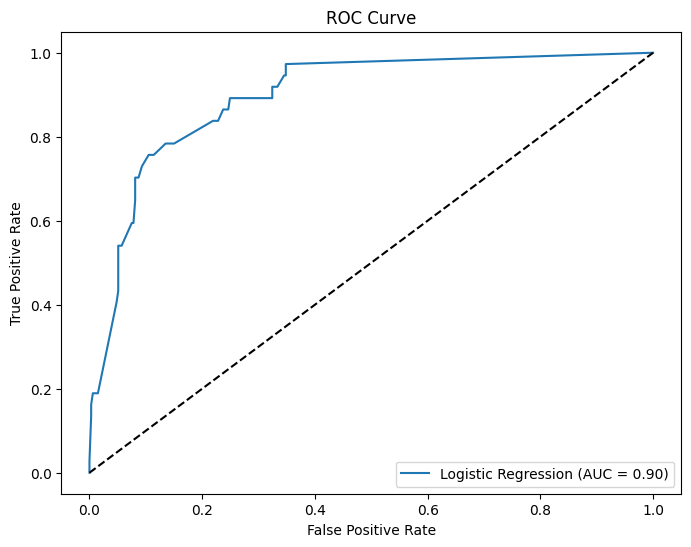

AUC: 0.90


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.3, random_state=42)

# Step 2: Train a Model with adjusted class_weight and regularization
model = LogisticRegression(class_weight='balanced', C=0.1)  # Adjust regularization 'C' value
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC AUC

# Step 4: Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Step 5: Display ROC Curve (instead of confusion matrix for AUC focus)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {auc:.2f}")


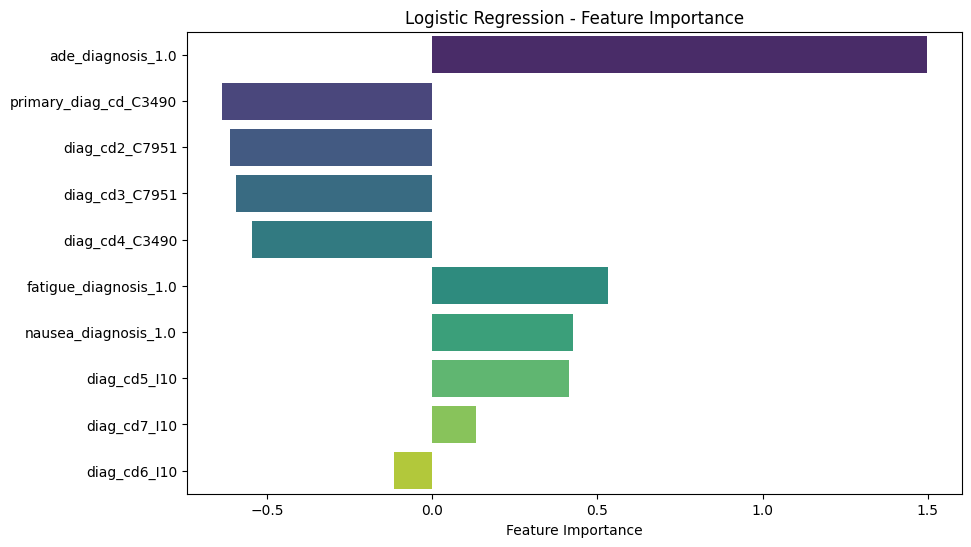

In [178]:


# Get feature coefficients from the trained logistic regression model
feature_importance = model.coef_[0]
feature_names = selected_features_df.columns.tolist()

# Create a dictionary mapping features to their coefficients
importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by their importance (absolute values for clarity)
sorted_importance = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in sorted_importance], y=[x[0] for x in sorted_importance], palette="viridis")
plt.xlabel('Feature Importance')
plt.title('Logistic Regression - Feature Importance')
plt.show()


In [179]:
from sklearn.metrics import confusion_matrix

# Step 6: Calculate True Positive Rate (TPR)
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tpr = tp / (tp + fn)

print(f"True Positive Rate (TPR): {tpr:.2f}")


True Positive Rate (TPR): 0.78


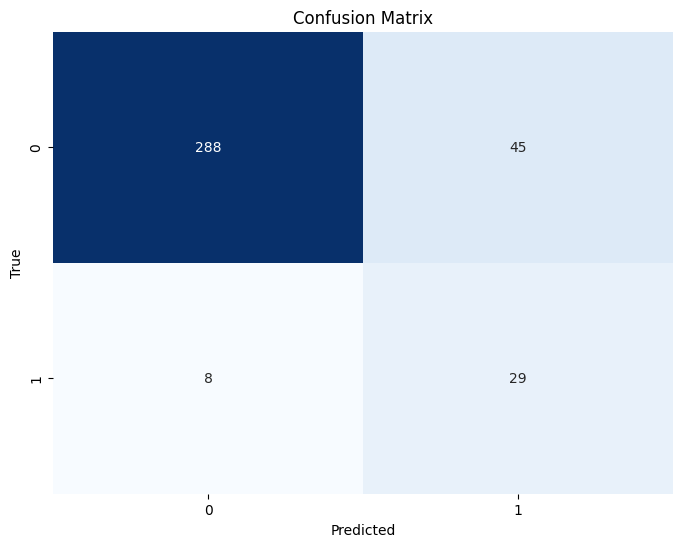

F1 Score: 0.52


In [180]:
from sklearn.metrics import confusion_matrix, f1_score


# Step 1: Make Predictions
y_pred = model.predict(X_test)

# Step 2: Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Calculate F1 Score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.2f}")


In [181]:
from sklearn.metrics import f1_score

# Step 6: Calculate F1 Score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.2f}")


F1 Score: 0.52


In [182]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[288  45]
 [  8  29]]


In [183]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) from the confusion matrix
tp = confusion[1, 1]

# Calculate the total number of actual '1's
total_actual_ones = confusion[1, 0] + confusion[1, 1]

# Calculate True Positive Rate (TPR) in percentage
tpr_percentage = (tp / total_actual_ones) * 100

# Print the True Positive Rate (TPR) as a percentage
print(f"True Positive Rate (TPR): {tpr_percentage:.2f}%")


True Positive Rate (TPR): 78.38%


In [184]:
target_train_df

,id,tgt_ade_dc_ind,est_age,avg_rx_cost,sum_rx_cost,avg_tot_drug_cost,sum_tot_drug_cost,count_maint_ind_MAINT,count_maint_ind_NONMAINT,count_specialty_ind_NONSPCL,...,diarrhea_treat_ind_1.0,nausea_treat_ind_1.0,seizure_treat_ind_1.0,seizure_diagnosis_1.0,pain_diagnosis_1.0,fatigue_diagnosis_1.0,nausea_diagnosis_1.0,hyperglycemia_diagnosis_1.0,constipation_diagnosis_1.0,diarrhea_diagnosis_1.0
0,1005597228,0,73.771976,7791.149333,116867.24,0.000000,0.00,7.0,8.0,8.0,...,0,0,1,1,0,0,0,0,0,0
1,1005964858,1,86.000000,3200.350000,16001.75,13079.012000,65395.06,4.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,1007548572,0,79.000000,420.624000,107259.12,65677.149294,16747673.07,242.0,13.0,249.0,...,0,0,0,0,0,1,0,0,0,0
3,1009508044,0,70.000000,1297.595441,88236.49,49617.351912,3373979.93,41.0,27.0,62.0,...,0,0,0,0,0,0,0,0,0,0
4,1028064791,0,74.000000,1310.403077,85176.20,17111.218462,1112229.20,18.0,47.0,61.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1005265852,1,91.000000,3811.002308,49543.03,20323.119231,264200.55,2.0,11.0,10.0,...,1,1,0,0,0,0,0,0,1,0
1228,1017236720,0,79.000000,4006.832500,128218.64,36088.399063,1154828.77,13.0,19.0,24.0,...,0,1,0,0,0,0,0,0,0,0
1229,1059781692,0,81.000000,5919.557500,94712.92,54190.955625,867055.29,1.0,15.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1230,1106680931,0,50.000000,5298.593333,15895.78,10594.446667,31783.34,0.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


# Let's drop rows with missing values for simplicity
target_train_df.dropna(inplace=True)

# Define the features (X) and target (y)
X = target_train_df.drop(['id', 'tgt_ade_dc_ind'], axis=1)
y = target_train_df['tgt_ade_dc_ind']

# Calculate class imbalance ratio
class_counts = y.value_counts()
class_imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Class Imbalance Ratio: {class_imbalance_ratio:.2f}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate sample weights based on class imbalance
sample_weights = y_train.apply(lambda label: 1 / class_counts[label])

# Initialize and fit the Gradient Boosting model with sample weights
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict probabilities of class 1 (tgt_ade_dc_ind == 1) for the test set
y_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate the AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y_test, y_probabilities)
print(f"AUC: {auc_score:.4f}")

# Predict binary classes (0 or 1)
y_pred = model.predict(X_test)

# Add predicted values and ranks to the DataFrame
df_test = target_train_df.loc[X_test.index].copy()
df_test['Predicted_Probability'] = y_probabilities
df_test['Predicted_Class'] = y_pred
df_test['Predicted_Rank'] = df_test['Predicted_Probability'].rank(ascending=False)

# Display the DataFrame with predicted values and ranks
print(df_test[['tgt_ade_dc_ind', 'Predicted_Probability', 'Predicted_Class', 'Predicted_Rank']])


Class Imbalance Ratio: 9.53
AUC: 0.9381
     tgt_ade_dc_ind  Predicted_Probability  Predicted_Class  Predicted_Rank
549               0               0.255670                0            58.0
1050              0               0.057767                0           109.0
244               1               0.111969                0            77.0
553               0               0.460982                0            39.0
1165              0               0.022636                0           274.0
...             ...                    ...              ...             ...
273               0               0.969097                1            19.0
427               0               0.057767                0           109.0
362               0               0.020209                0           328.0
237               0               0.020209                0           328.0
1039              0               0.019662                0           358.0

[370 rows x 4 columns]


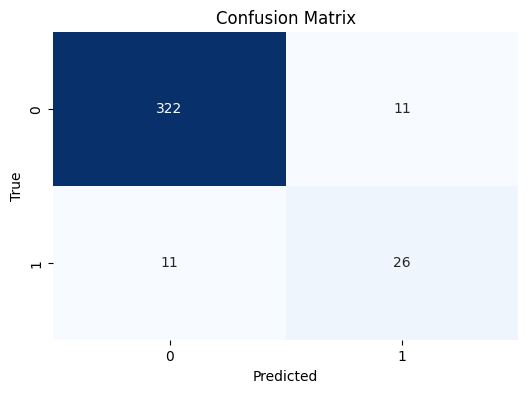

F1 Score: 0.7027


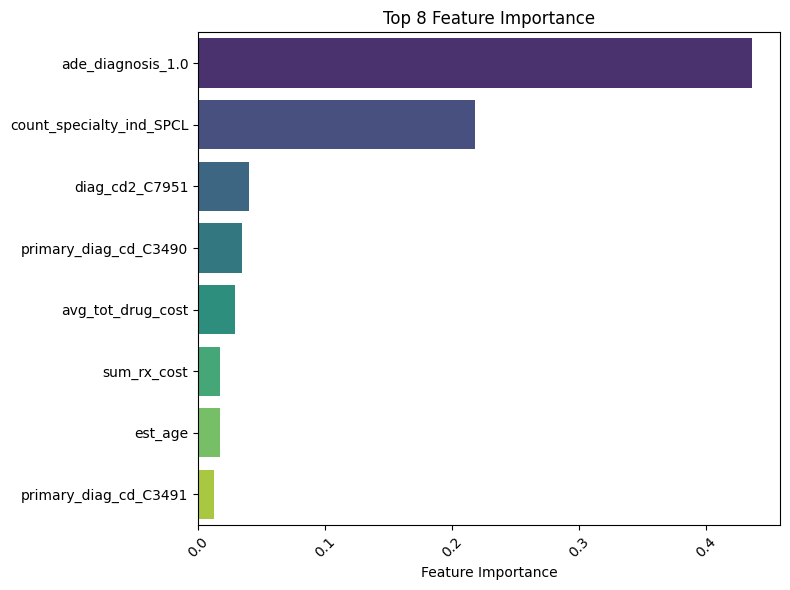

In [186]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Compute Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns.tolist()

# Create a dictionary mapping features to their importances
importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by their importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Sort the features by their importance and select top features
top_n = 8  # Set the number of top features to display
top_importance = sorted_importance[:top_n]

plt.figure(figsize=(8, 6))
sns.barplot(x=[x[1] for x in top_importance], y=[x[0] for x in top_importance], palette="viridis")
plt.xlabel('Feature Importance')
plt.title('Top 8 Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



AUC: 0.9381


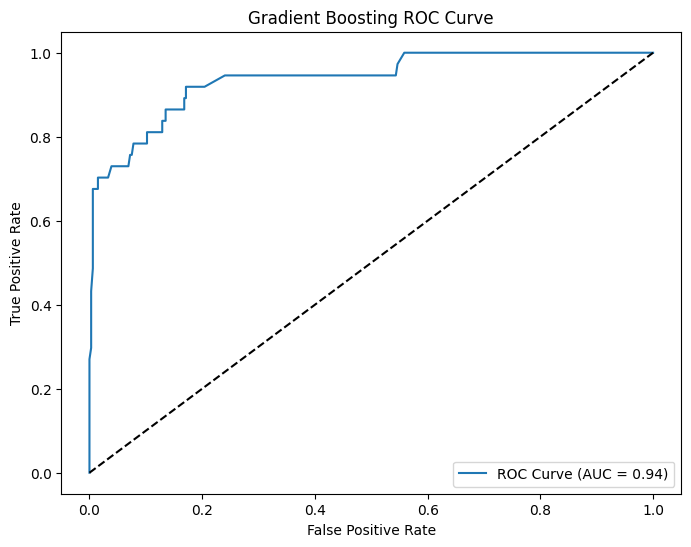

In [187]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate False Positive Rate, True Positive Rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_probabilities)
print(f"AUC: {auc:.4f}")

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [188]:
from sklearn.metrics import classification_report

# Compute and print Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       333
           1       0.70      0.70      0.70        37

    accuracy                           0.94       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.94      0.94      0.94       370



In [189]:
from sklearn.metrics import classification_report

# Assuming you have generated the classification report already
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

# Extract F1 score from the classification report
report_lines = class_report.split('\n')
f1_score = float(report_lines[-2].split()[3])  # Assuming F1 score is the last metric in the report

print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       333
           1       0.70      0.70      0.70        37

    accuracy                           0.94       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.94      0.94      0.94       370

F1 Score: 0.94


In [190]:
from sklearn.metrics import classification_report

# Assuming you have generated the classification report already
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

# Extract True Positive Rate (TPR) from the classification report
report_lines = class_report.split('\n')

# Search for the line containing 'recall' for the class of interest, assuming it's class 1 (index 1)
# Modify the index if you're interested in another class or if the format of the report differs
tpr = float(report_lines[3].split()[3])  # Assuming recall is in the fourth line for class 1

print("True Positive Rate (TPR/Recall/Sensitivity):", tpr)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       333
           1       0.70      0.70      0.70        37

    accuracy                           0.94       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.94      0.94      0.94       370

True Positive Rate (TPR/Recall/Sensitivity): 0.7


In [191]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix


# Let's drop rows with missing values for simplicity
target_train_df.dropna(inplace=True)

# Convert 'tgt_ade_dc_ind' column to numeric (0 and 1)
target_train_df['tgt_ade_dc_ind'] = target_train_df['tgt_ade_dc_ind'].astype(int)

# Define the features (X) and target (y)
X = target_train_df.drop(['id', 'tgt_ade_dc_ind'], axis=1)
y = target_train_df['tgt_ade_dc_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class weights based on class imbalance
class_counts = y_train.value_counts()
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}

# Create a LightGBM dataset for training and specify class weights
train_data = lgb.Dataset(X_train, label=y_train, weight=y_train.map(class_weights))

# Define custom evaluation function for AUC
def auc_eval(preds, train_data):
    y_true = train_data.get_label()
    return 'auc', roc_auc_score(y_true, preds), True

# Define hyperparameters for the LightGBM model
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'num_leaves': 200,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model with custom objective and evaluation functions
num_boost_round = 100
model = lgb.train(params, train_data, num_boost_round=num_boost_round, feval=auc_eval)

# Predict probabilities of class 1 (tgt_ade_dc_ind == 1) for the test set
y_probabilities = model.predict(X_test)

# Calculate the AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y_test, y_probabilities)
print(f"AUC: {auc_score:.4f}")

# Predict binary classes (0 or 1) by thresholding the probabilities
threshold = 0.5
y_pred = (y_probabilities > threshold).astype(int)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) from the confusion matrix
tp = confusion[1, 1]

# Calculate the total number of actual '1's
total_actual_ones = confusion[1, 0] + confusion[1, 1]

# Calculate True Positive Rate (TPR) as a percentage
tpr_percentage = (tp / total_actual_ones) * 100

# Display the True Positive Rate (TPR) as a percentage
print(f"True Positive Rate (TPR) as a percentage: {tpr_percentage:.2f}%")
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) from the confusion matrix
tp = confusion[1, 1]

# Calculate the total number of actual '1's
total_actual_ones = confusion[1, 0] + confusion[1, 1]

# Calculate True Positive Rate (TPR) as a percentage
tpr_percentage = (tp / total_actual_ones) * 100

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

# Display the True Positive Rate (TPR) as a percentage and the F1-score
print(f"True Positive Rate (TPR) as a percentage: {tpr_percentage:.2f}%")
print(f"F1-Score: {f1:.4f}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

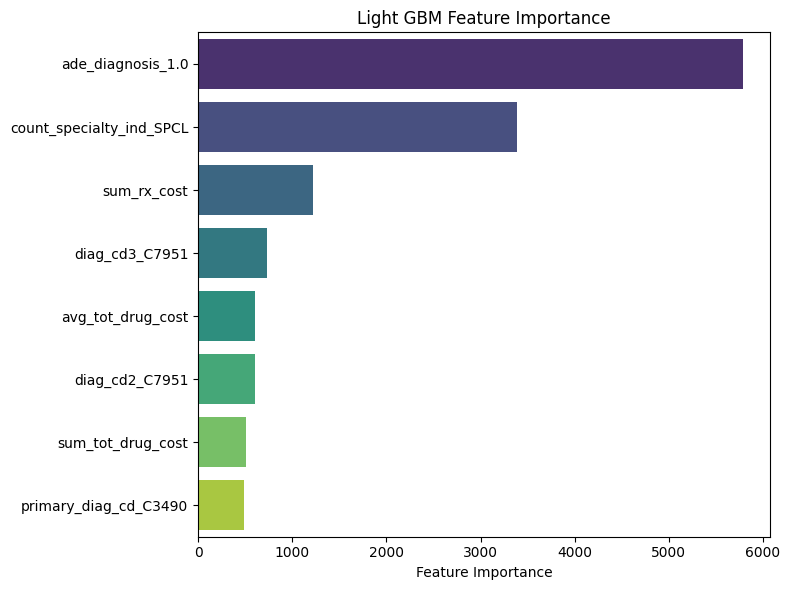

In [192]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Train the LightGBM model (existing code)

# Get feature importance
feature_importance = model.feature_importance(importance_type='gain')
feature_names = X.columns.tolist()

# Create a dictionary mapping features to their importances
importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by their importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top 7-8 most important features
top_n = 8
top_importance = sorted_importance[:top_n]

# Get the names of the top features
top_feature_names = [x[0] for x in top_importance]

# Filter the data to include only the top features
X_top_features = X[top_feature_names]

# Now, X_top_features contains only the top 7-8 important features
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance values for the top features
top_feature_importance = [importance_dict[feature] for feature in top_feature_names]

# Plotting feature importance for the top features
plt.figure(figsize=(8, 6))
sns.barplot(x=top_feature_importance, y=top_feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.title('Light GBM Feature Importance')
plt.tight_layout()
plt.show()



In [193]:
# Retrain the model using only the top features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Define and train the LightGBM model on the top features
model_top = lgb.LGBMClassifier()
model_top.fit(X_train_top, y_train)

# Predict using the model trained on top features
y_pred_top = model_top.predict(X_test_top)

# Calculate metrics on the predictions
accuracy_top = accuracy_score(y_test, y_pred_top)
conf_matrix_top = confusion_matrix(y_test, y_pred_top)
true_positives_top = conf_matrix_top[1, 1]
f1_top = f1_score(y_test, y_pred_top)

# Print metrics
print("Accuracy with top features:", accuracy_top)
print("True Positives with top features:", true_positives_top)
print("F1 Score with top features:", f1_top)


[LightGBM] [Info] Number of positive: 91, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.092386 -> initscore=-2.284846
[LightGBM] [Info] Start training from score -2.284846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy with top features: 0.951417004048583
True Positives with top features: 17
F1 Score with top features: 0.7391304347826088


In [194]:
# Calculate True Positive Rate (Sensitivity/Recall)
true_positives_top = conf_matrix_top[1, 1]
false_negatives_top = conf_matrix_top[1, 0]  # False negatives are in the second row and first column of the confusion matrix
actual_positives = true_positives_top + false_negatives_top  # Total actual positive instances

# Calculate True Positive Rate
true_positive_rate_top = true_positives_top / actual_positives

# Print True Positive Rate
print("True Positive Rate with top features:", true_positive_rate_top)


True Positive Rate with top features: 0.6538461538461539


In [195]:
url = '/content/drive/MyDrive/2023_TAMU_competition_data/target_holdout_test.csv'
target_holdout_test = pd.read_csv(url)

In [196]:
import pandas as pd
import lightgbm as lgb


# Preprocess the test data (similar to how you preprocessed the training data)
# For example, drop unnecessary columns and perform any necessary feature engineering
X_test = target_holdout_test.drop(['id'], axis=1)  # Adjust columns as needed

# Predict probabilities of class 1 (tgt_ade_dc_ind == 1) for the test set
y_probabilities = model.predict(X_test,predict_disable_shape_check=True)

# You can also predict binary classes (0 or 1) by thresholding the probabilities
threshold = 0.5  # You can adjust the threshold as needed
y_pred = (y_probabilities > threshold).astype(int)

# Add the predictions to the test DataFrame (optional)
target_holdout_test['Predicted_Probability'] = y_probabilities
target_holdout_test['Predicted_Class'] = y_pred

# Display or save the DataFrame with predictions
print(target_holdout_test[['id', 'Predicted_Probability', 'Predicted_Class']])


             id  Predicted_Probability  Predicted_Class
0    1018450235               0.029489                0
1    1032849118               0.057232                0
2    1044251683               0.117974                0
3    1086171816               0.287955                0
4    1093074743               0.089350                0
..          ...                    ...              ...
415  1057438445               0.074629                0
416  1065167833               0.151382                0
417  1100593403               0.672467                1
418  1021720242               0.119703                0
419  1117110566               0.239343                0

[420 rows x 3 columns]


In [197]:
import pandas as pd
import lightgbm as lgb
import numpy as np



# Preprocess the test data (similar to how you preprocessed the training data)
# For example, drop unnecessary columns and perform any necessary feature engineering
X_test = target_holdout_test.drop(['id'], axis=1)  # Adjust columns as needed

# Predict probabilities of class 1 (tgt_ade_dc_ind == 1) for the test set
y_probabilities = model.predict(X_test, predict_disable_shape_check=True)

# You can also predict binary classes (0 or 1) by thresholding the probabilities
threshold = 0.5  # You can adjust the threshold as needed
y_pred = (y_probabilities > threshold).astype(int)

# Add the predictions to the test DataFrame (optional)
target_holdout_test['Predicted_Probability'] = y_probabilities
target_holdout_test['Predicted_Class'] = y_pred

# Calculate the rank of predicted probabilities and add it as a new column
target_holdout_test['Predicted_Rank'] = pd.Series(y_probabilities).rank(ascending=False)

# Display or save the DataFrame with predictions and ranks
print(target_holdout_test[['id', 'Predicted_Probability', 'Predicted_Class', 'Predicted_Rank']])



             id  Predicted_Probability  Predicted_Class  Predicted_Rank
0    1018450235               0.029489                0           400.0
1    1032849118               0.057232                0           352.0
2    1044251683               0.117974                0           223.0
3    1086171816               0.287955                0            54.0
4    1093074743               0.089350                0           293.0
..          ...                    ...              ...             ...
415  1057438445               0.074629                0           319.0
416  1065167833               0.151382                0           173.0
417  1100593403               0.672467                1             4.0
418  1021720242               0.119703                0           216.0
419  1117110566               0.239343                0            75.0

[420 rows x 4 columns]


In [198]:
target_holdout_test=target_holdout_test[['id', 'Predicted_Probability', 'Predicted_Class', 'Predicted_Rank']]

In [199]:

import pandas as pd
from google.colab import files

# Let's save it to a CSV file
target_holdout_test.to_csv('target_holdout_test.csv', index=False)

# Download the CSV file
files.download('target_holdout_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score

# Let's drop rows with missing values for simplicity
target_train_df.dropna(inplace=True)

# Convert 'tgt_ade_dc_ind' column to numeric (0 and 1)
target_train_df['tgt_ade_dc_ind'] = target_train_df['tgt_ade_dc_ind'].astype(int)

# Define the features (X) and target (y)
X = target_train_df.drop(['id', 'tgt_ade_dc_ind'], axis=1)
y = target_train_df['tgt_ade_dc_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Calculate class weights based on class imbalance
class_counts = y_train.value_counts()
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}

# Create a LightGBM dataset for training and specify class weights
train_data = lgb.Dataset(X_train, label=y_train, weight=y_train.map(class_weights))

# Define custom evaluation function for AUC
def auc_eval(preds, train_data):
    y_true = train_data.get_label()
    return 'auc', roc_auc_score(y_true, preds), True

# Define hyperparameters for the LightGBM model
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'num_leaves': 200,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model with custom objective and evaluation functions
num_boost_round = 100
model = lgb.train(params, train_data, num_boost_round=num_boost_round, feval=auc_eval)

# Predict probabilities of class 1 (tgt_ade_dc_ind == 1) for the test set
y_probabilities = model.predict(X_test)

# Calculate the AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y_test, y_probabilities)
print(f"AUC: {auc_score:.4f}")

# Predict binary classes (0 or 1) by thresholding the probabilities
threshold = 0.5
y_pred = (y_probabilities > threshold).astype(int)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) from the confusion matrix
tp = confusion[1, 1]

# Calculate the total number of actual '1's
total_actual_ones = confusion[1, 0] + confusion[1, 1]

# Calculate True Positive Rate (TPR) as a percentage
tpr_percentage = (tp / total_actual_ones) * 100

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

# Display the True Positive Rate (TPR) as a percentage and the F1-score
print(f"True Positive Rate (TPR) as a percentage: {tpr_percentage:.2f}%")
print(f"F1-Score: {f1:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

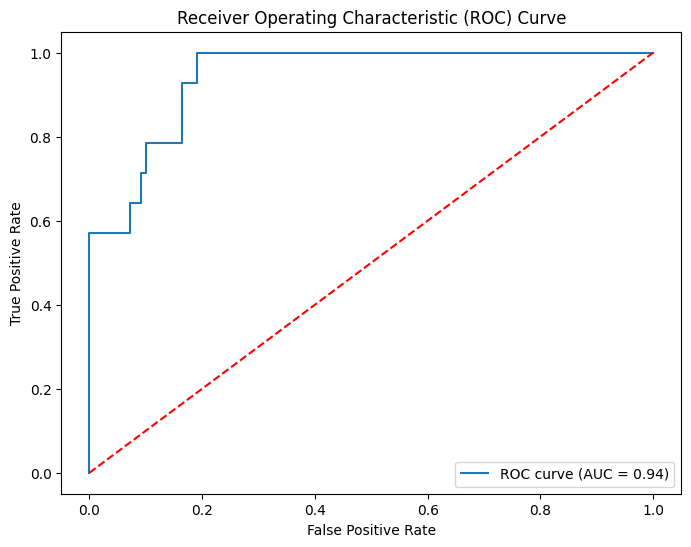

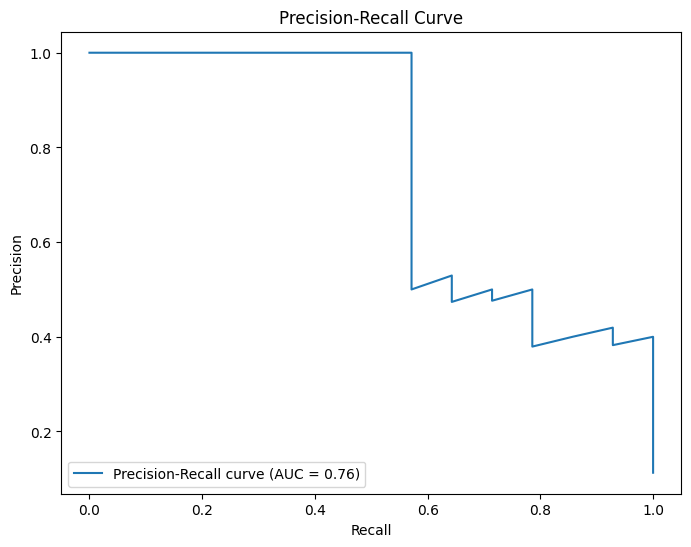

Confusion Matrix:
[[108   2]
 [  6   8]]
Precision: 0.8000
Recall: 0.5714
F1-Score: 0.6667


In [201]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, auc

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and area under the curve (AUC)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probabilities)
average_precision = average_precision_score(y_test, y_probabilities)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate precision, recall, and F1-score
precision = tp / (confusion[0, 1] + confusion[1, 1])
recall = tp / total_actual_ones
f1_score = 2 * (precision * recall) / (precision + recall)

# Display precision, recall, and F1-score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
